In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
import matplotlib.pyplot as plt

In [2]:
def getFiles(file_list, which):
    datapath = "./../2022"
    for root, dirs, files in os.walk(datapath):
        for file in files:
            if ('csv' in file and (file[0] == which)):
                file_list.append(os.path.join(root, file))
                
Thingy_list = []
Respect_list = []

getFiles(Thingy_list, 'T')
getFiles(Respect_list, 'R')

print(len(Thingy_list), len(Respect_list))

1092 1092


In [3]:
def all_csv_to_dataframe(dataframe, thingy_list, respect_list):
    for i in range(len(thingy_list)):
        thingy_file = thingy_list[i]
        respect_file = respect_list[i]
        if thingy_file[25:43] == respect_file[26:44]:
            
            new_thingy = pd.read_csv(thingy_file)
            new_thingy = new_thingy.rename(columns=
                             {'accel_x'      :'T_accel_x',
                              'accel_y'      :'T_accel_y',
                              'accel_z'      :'T_accel_z',
                              'gyro_x'       :'T_gyro_x' ,
                              'gyro_y'       :'T_gyro_y' ,
                              'gyro_z'       :'T_gyro_z' ,
                              'activity_code':'T_activity_code',
                              'activity_type':'T_activity_type'})
            new_respect = pd.read_csv(respect_file)
            new_respect = new_respect.rename(columns=
                             {'accel_x'      :'R_accel_x',
                              'accel_y'      :'R_accel_y',
                              'accel_z'      :'R_accel_z',
                              'gyro_x'       :'R_gyro_x' ,
                              'gyro_y'       :'R_gyro_y' ,
                              'gyro_z'       :'R_gyro_z' ,
                              'activity_code':'R_activity_code',
                              'activity_type':'R_activity_type'})
            if (new_thingy['T_activity_code'][0] != new_respect['R_activity_code'][0]):
                continue
            new_dataframe = pd.concat([new_thingy, new_respect], axis=1)
            dataframe = pd.concat([dataframe, new_dataframe])
    dataframe = dataframe.dropna()
    return dataframe

dataframe = pd.DataFrame()
dataframe = all_csv_to_dataframe(dataframe, Thingy_list, Respect_list)

In [4]:
# Somehow there are 6873 and 664 null activity code/type in thingy and respect
print(dataframe['T_activity_code'].isnull().sum(), dataframe['R_activity_code'].isnull().sum())
dataframe = dataframe.dropna()
print(dataframe['T_activity_code'].isnull().sum(), dataframe['R_activity_code'].isnull().sum())

print(pd.unique(dataframe['T_activity_code']))
print(pd.unique(dataframe['R_activity_code']))

0 0
0 0
[ 12.  13.  31.   7.   2.   8.   6.   9.  11.   5.   4.   0. 100.   1.]
[ 12.  13.  31.   7.   2.   8.   6.   9.  11.   5.   4.   0. 100.   1.]


In [5]:
# Proof of all Thingy acitivy code are the same as all Respect activity code
not_same = dataframe['T_activity_code'] != dataframe['R_activity_code']
np.where(not_same)

(array([], dtype=int64),)

In [46]:
dataframe.loc[dataframe['R_activity_type'] != 'Climbing stairs']

,timestamp,T_accel_x,T_accel_y,T_accel_z,T_gyro_x,T_gyro_y,T_gyro_z,mag_x,mag_y,mag_z,...,R_accel_z,R_gyro_x,R_gyro_y,R_gyro_z,sensor_type,R_activity_type,R_activity_code,subject_id,notes,recording_id
0,1.664544e+12,-0.953125,0.094727,0.053711,-1.31250,15.90625,16.68750,0.0,0.0,0.0,...,0.127380,4.984375,5.015625,1.171875,Respeck,Descending stairs,13.0,s1732873,1.0,Respeck_s1732873_Descending stairs_04-10-2022_...
1,1.664544e+12,-1.095703,-0.280273,0.198242,-107.40625,32.46875,17.46875,0.0,0.0,0.0,...,0.300964,-3.578125,-5.062500,0.437500,Respeck,Descending stairs,13.0,s1732873,1.0,Respeck_s1732873_Descending stairs_04-10-2022_...
2,1.664544e+12,-0.833008,0.002930,0.344727,28.59375,-52.18750,7.78125,0.0,0.0,0.0,...,0.255554,-5.265625,-28.921875,-7.187500,Respeck,Descending stairs,13.0,s1732873,1.0,Respeck_s1732873_Descending stairs_04-10-2022_...
3,1.664544e+12,-1.623047,0.089844,0.385742,33.53125,-83.75000,-30.90625,0.0,0.0,0.0,...,0.051453,-7.031250,-37.046875,-2.156250,Respeck,Descending stairs,13.0,s1732873,1.0,Respeck_s1732873_Descending stairs_04-10-2022_...
4,1.664544e+12,-1.821289,0.583984,0.400391,-47.75000,-117.03125,-79.31250,0.0,0.0,0.0,...,0.278259,-4.218750,-14.296875,11.828125,Respeck,Descending stairs,13.0,s1732873,1.0,Respeck_s1732873_Descending stairs_04-10-2022_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1.664972e+12,-0.992188,-0.336914,-0.117188,15.65625,60.71875,56.53125,0.0,0.0,0.0,...,0.036560,4.625000,-0.875000,2.203125,Respeck,Walking at normal speed,1.0,s2308859,stairs,Respeck_s2308859_Walking at normal speed_05-10...
748,1.664972e+12,-0.906250,-0.300781,-0.158203,21.93750,87.81250,67.68750,0.0,0.0,0.0,...,0.085876,3.531250,-1.578125,1.531250,Respeck,Walking at normal speed,1.0,s2308859,stairs,Respeck_s2308859_Walking at normal speed_05-10...
749,1.664972e+12,-0.874023,-0.291016,-0.209961,52.81250,83.53125,38.75000,0.0,0.0,0.0,...,0.128845,0.781250,-3.765625,0.968750,Respeck,Walking at normal speed,1.0,s2308859,stairs,Respeck_s2308859_Walking at normal speed_05-10...
750,1.664972e+12,-1.022461,-0.262695,0.307617,-14.87500,122.84375,20.15625,0.0,0.0,0.0,...,0.205505,-1.375000,-1.640625,-1.015625,Respeck,Walking at normal speed,1.0,s2308859,stairs,Respeck_s2308859_Walking at normal speed_05-10...


In [45]:
dataframe.loc[dataframe['R_activity_type'] == dataframe['T_activity_type']]

,timestamp,T_accel_x,T_accel_y,T_accel_z,T_gyro_x,T_gyro_y,T_gyro_z,mag_x,mag_y,mag_z,...,R_accel_z,R_gyro_x,R_gyro_y,R_gyro_z,sensor_type,R_activity_type,R_activity_code,subject_id,notes,recording_id
0,1.664544e+12,-0.903320,0.254883,-0.069336,-30.62500,34.28125,6.43750,0.0,0.0,0.0,...,0.143982,16.125000,6.187500,9.515625,Respeck,Climbing stairs,12.0,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...
1,1.664544e+12,-0.942383,0.306641,0.042969,-33.31250,54.96875,4.84375,0.0,0.0,0.0,...,0.059509,15.468750,6.812500,18.062500,Respeck,Climbing stairs,12.0,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...
2,1.664544e+12,-1.070312,0.260742,0.077148,0.50000,41.25000,24.37500,0.0,0.0,0.0,...,0.060974,1.953125,-5.453125,15.625000,Respeck,Climbing stairs,12.0,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...
3,1.664544e+12,-1.277344,0.313477,-0.056641,6.12500,19.93750,20.34375,0.0,0.0,0.0,...,0.096619,-4.015625,-5.156250,10.718750,Respeck,Climbing stairs,12.0,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...
4,1.664544e+12,-1.381836,0.245117,-0.311523,-27.31250,5.34375,14.37500,0.0,0.0,0.0,...,0.167419,-9.843750,-7.828125,9.671875,Respeck,Climbing stairs,12.0,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1.664972e+12,-0.992188,-0.336914,-0.117188,15.65625,60.71875,56.53125,0.0,0.0,0.0,...,0.036560,4.625000,-0.875000,2.203125,Respeck,Walking at normal speed,1.0,s2308859,stairs,Respeck_s2308859_Walking at normal speed_05-10...
748,1.664972e+12,-0.906250,-0.300781,-0.158203,21.93750,87.81250,67.68750,0.0,0.0,0.0,...,0.085876,3.531250,-1.578125,1.531250,Respeck,Walking at normal speed,1.0,s2308859,stairs,Respeck_s2308859_Walking at normal speed_05-10...
749,1.664972e+12,-0.874023,-0.291016,-0.209961,52.81250,83.53125,38.75000,0.0,0.0,0.0,...,0.128845,0.781250,-3.765625,0.968750,Respeck,Walking at normal speed,1.0,s2308859,stairs,Respeck_s2308859_Walking at normal speed_05-10...
750,1.664972e+12,-1.022461,-0.262695,0.307617,-14.87500,122.84375,20.15625,0.0,0.0,0.0,...,0.205505,-1.375000,-1.640625,-1.015625,Respeck,Walking at normal speed,1.0,s2308859,stairs,Respeck_s2308859_Walking at normal speed_05-10...


In [6]:
dataframe.head(10)

,timestamp,T_accel_x,T_accel_y,T_accel_z,T_gyro_x,T_gyro_y,T_gyro_z,mag_x,mag_y,mag_z,...,R_accel_z,R_gyro_x,R_gyro_y,R_gyro_z,sensor_type,R_activity_type,R_activity_code,subject_id,notes,recording_id
0,1.664544e+12,-0.903320,0.254883,-0.069336,-30.62500,34.28125,6.43750,0.00,0.0000,0.0000,...,0.143982,16.125000,6.187500,9.515625,Respeck,Climbing stairs,12.0,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...
1,1.664544e+12,-0.942383,0.306641,0.042969,-33.31250,54.96875,4.84375,0.00,0.0000,0.0000,...,0.059509,15.468750,6.812500,18.062500,Respeck,Climbing stairs,12.0,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...
2,1.664544e+12,-1.070312,0.260742,0.077148,0.50000,41.25000,24.37500,0.00,0.0000,0.0000,...,0.060974,1.953125,-5.453125,15.625000,Respeck,Climbing stairs,12.0,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...
3,1.664544e+12,-1.277344,0.313477,-0.056641,6.12500,19.93750,20.34375,0.00,0.0000,0.0000,...,0.096619,-4.015625,-5.156250,10.718750,Respeck,Climbing stairs,12.0,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...
4,1.664544e+12,-1.381836,0.245117,-0.311523,-27.31250,5.34375,14.37500,0.00,0.0000,0.0000,...,0.167419,-9.843750,-7.828125,9.671875,Respeck,Climbing stairs,12.0,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...
5,1.664544e+12,-1.316406,0.525391,-0.011719,-7.25000,-17.53125,0.03125,0.00,0.0000,0.0000,...,0.127380,-9.265625,-9.765625,11.359375,Respeck,Climbing stairs,12.0,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...
6,1.664544e+12,-1.266602,0.406250,0.391602,-44.65625,-63.56250,-2.78125,0.00,0.0000,0.0000,...,0.199158,-1.750000,-7.796875,10.468750,Respeck,Climbing stairs,12.0,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...
7,1.664544e+12,-1.302734,0.267578,0.429688,-115.93750,-119.84375,-6.87500,0.00,0.0000,0.0000,...,0.213562,-1.937500,-10.531250,11.437500,Respeck,Climbing stairs,12.0,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...
8,1.664544e+12,-1.202148,0.401367,-0.091797,-184.43750,-109.87500,-32.25000,0.00,0.0000,0.0000,...,0.240662,-0.125000,-8.343750,10.859375,Respeck,Climbing stairs,12.0,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...
9,1.664544e+12,-1.224609,0.260742,-0.543945,-142.56250,-90.90625,-101.28125,-71.25,-20.1875,-87.1875,...,0.262634,2.109375,-8.718750,10.328125,Respeck,Climbing stairs,12.0,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...


In [6]:
def create_dataset(dataframe, data_columns, label_column, time_steps=1, step=1):
    XX, YY = [], []
    raw_x = dataframe[data_columns]
    raw_y = dataframe[label_column]
    
    for i in range(0, len(raw_x) - time_steps, step):
        label = raw_y.iloc[i].values
        value = raw_x.iloc[i]
        same = True
        for j in range(i + 1, i + time_steps):
            if label != raw_y.iloc[j].values:
                same = False
                break
        if not same:
            continue
        else:
            value = raw_x.iloc[i: i + time_steps]
        XX.append(value)
        YY.append(label)
        
    X = np.array(XX)
    Y = np.array(YY)
    return X, Y

Thingy_columns = ['T_accel_x', 'T_accel_y', 'T_accel_z', 'T_gyro_x', 'T_gyro_y', 'T_gyro_z', 'mag_x', 'mag_y', 'mag_z']
Thingy_label = ['T_activity_type']
Respect_columns = ['R_accel_x', 'R_accel_y', 'R_accel_z', 'R_gyro_x', 'R_gyro_y', 'R_gyro_z']
Respect_label = ['R_activity_type']

In [7]:
# Thingy data only
X_Thingy, y_Thingy = create_dataset(dataframe, Thingy_columns, Thingy_label, 50, 10)
X_train_Thingy, X_test_Thingy, y_train_Thingy, y_test_Thingy = train_test_split(X_Thingy, y_Thingy, random_state=111)

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder = encoder.fit(y_train_Thingy)
y_train_Thingy = encoder.transform(y_train_Thingy)
y_test_Thingy  = encoder.transform(y_test_Thingy)
print(X_train_Thingy.shape, X_test_Thingy.shape, y_train_Thingy.shape, y_test_Thingy.shape)

(13752, 50, 9) (4585, 50, 9) (13752, 14) (4585, 14)


In [8]:
# Respect data only
X_Respect, y_Respect = create_dataset(dataframe, Respect_columns, Respect_label, 50, 10)
X_train_Respect, X_test_Respect, y_train_Respect, y_test_Respect = train_test_split(X_Respect, y_Respect, random_state=111)

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder = encoder.fit(y_train_Respect)
y_train_Respect = encoder.transform(y_train_Respect)
y_test_Respect  = encoder.transform(y_test_Respect)
print(X_train_Respect.shape, X_test_Respect.shape, y_train_Respect.shape, y_test_Respect.shape)

(13752, 50, 6) (4585, 50, 6) (13752, 14) (4585, 14)


In [9]:
# All data
X, y = create_dataset(dataframe, Thingy_columns + Respect_columns, Respect_label, 50, 10)
X_train, X_test, pre_y_train, pre_y_test = train_test_split(X, y, random_state=111)

In [10]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder = encoder.fit(pre_y_train)
y_train = encoder.transform(pre_y_train)
y_test  = encoder.transform(pre_y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13752, 50, 15) (4585, 50, 15) (13752, 14) (4585, 14)


In [11]:
encoder.categories_[0]

array(['Climbing stairs', 'Descending stairs', 'Desk work',
       'Lying down left', 'Lying down on back', 'Lying down on stomach',
       'Lying down right', 'Movement', 'Running', 'Sitting',
       'Sitting bent backward', 'Sitting bent forward', 'Standing',
       'Walking at normal speed'], dtype=object)

In [13]:
print(pd.unique(dataframe.iloc[:,24]))
print(pd.unique(dataframe.iloc[:,25]))

['Climbing stairs' 'Descending stairs' 'Desk work' 'Lying down left'
 'Lying down on back' 'Lying down on stomach' 'Lying down right' 'Running'
 'Sitting bent backward' 'Sitting bent forward' 'Sitting' 'Standing'
 'Walking at normal speed']
[ 12.  13.  31.   7.   2.   8.   6.  11.   5.   4.   0. 100.   1.]


In [12]:
def create_model(X, y):
    n_timesteps, n_features, n_outputs = X.shape[1], X.shape[2], y.shape[1]
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(tf.keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # train model
    model.fit(X, y, epochs=30, batch_size=32, verbose=1)
    return model

all_model = create_model(X_train, y_train)

Epoch 1/30
430/430 [==============================] - 12s 25ms/step - loss: 1.4795 - accuracy: 0.5199
Epoch 2/30
430/430 [==============================] - 10s 23ms/step - loss: 0.3198 - accuracy: 0.8837
Epoch 3/30
430/430 [==============================] - 10s 23ms/step - loss: 0.1791 - accuracy: 0.9415
Epoch 4/30
430/430 [==============================] - 9s 21ms/step - loss: 0.1342 - accuracy: 0.9572
Epoch 5/30
430/430 [==============================] - 11s 27ms/step - loss: 0.1012 - accuracy: 0.9682
Epoch 6/30
430/430 [==============================] - 11s 25ms/step - loss: 0.0723 - accuracy: 0.9773
Epoch 7/30
430/430 [==============================] - 9s 20ms/step - loss: 0.0592 - accuracy: 0.9809
Epoch 8/30
430/430 [==============================] - 9s 20ms/step - loss: 0.0842 - accuracy: 0.9781
Epoch 9/30
430/430 [==============================] - 10s 24ms/step - loss: 0.0943 - accuracy: 0.9759
Epoch 10/30
430/430 [==============================] - 9s 21ms/step - loss: 0.0434 - 

In [13]:
respeck_model = create_model(X_train_Respect, y_train_Respect)
thingy_model = create_model(X_train_Thingy, y_train_Thingy)

Epoch 1/30
430/430 [==============================] - 11s 24ms/step - loss: 1.0183 - accuracy: 0.6142
Epoch 2/30
430/430 [==============================] - 14s 32ms/step - loss: 0.4851 - accuracy: 0.8071
Epoch 3/30
430/430 [==============================] - 13s 30ms/step - loss: 0.3654 - accuracy: 0.8567
Epoch 4/30
430/430 [==============================] - 10s 24ms/step - loss: 0.2633 - accuracy: 0.8957
Epoch 5/30
430/430 [==============================] - 9s 20ms/step - loss: 0.2453 - accuracy: 0.9119
Epoch 6/30
430/430 [==============================] - 10s 23ms/step - loss: 0.1736 - accuracy: 0.9384
Epoch 7/30
430/430 [==============================] - 10s 22ms/step - loss: 0.1443 - accuracy: 0.9487
Epoch 8/30
430/430 [==============================] - 9s 20ms/step - loss: 0.0784 - accuracy: 0.9715
Epoch 9/30
430/430 [==============================] - 9s 21ms/step - loss: 0.1081 - accuracy: 0.9644
Epoch 10/30
430/430 [==============================] - 9s 20ms/step - loss: 0.0824 - 

In [14]:
all_results = all_model.evaluate(X_test, y_test, batch_size=32, verbose=0)
print("test loss, test acc:", all_results)

test loss, test acc: [0.08225159347057343, 0.9829879999160767]


In [15]:
respeck_results = respeck_model.evaluate(X_test_Respect, y_test_Respect, batch_size=32, verbose=0)
print("test loss, test acc:", respeck_results)

thingy_results = thingy_model.evaluate(X_test_Thingy, y_test_Thingy, batch_size=32, verbose=0)
print("test loss, test acc:", thingy_results)

test loss, test acc: [0.1374068260192871, 0.9723010063171387]
test loss, test acc: [0.09478210657835007, 0.9747000932693481]


In [16]:
predy = all_model.predict(X_test)
print(predy.shape)

144/144 [==============================] - 7s 42ms/step
(4585, 14)


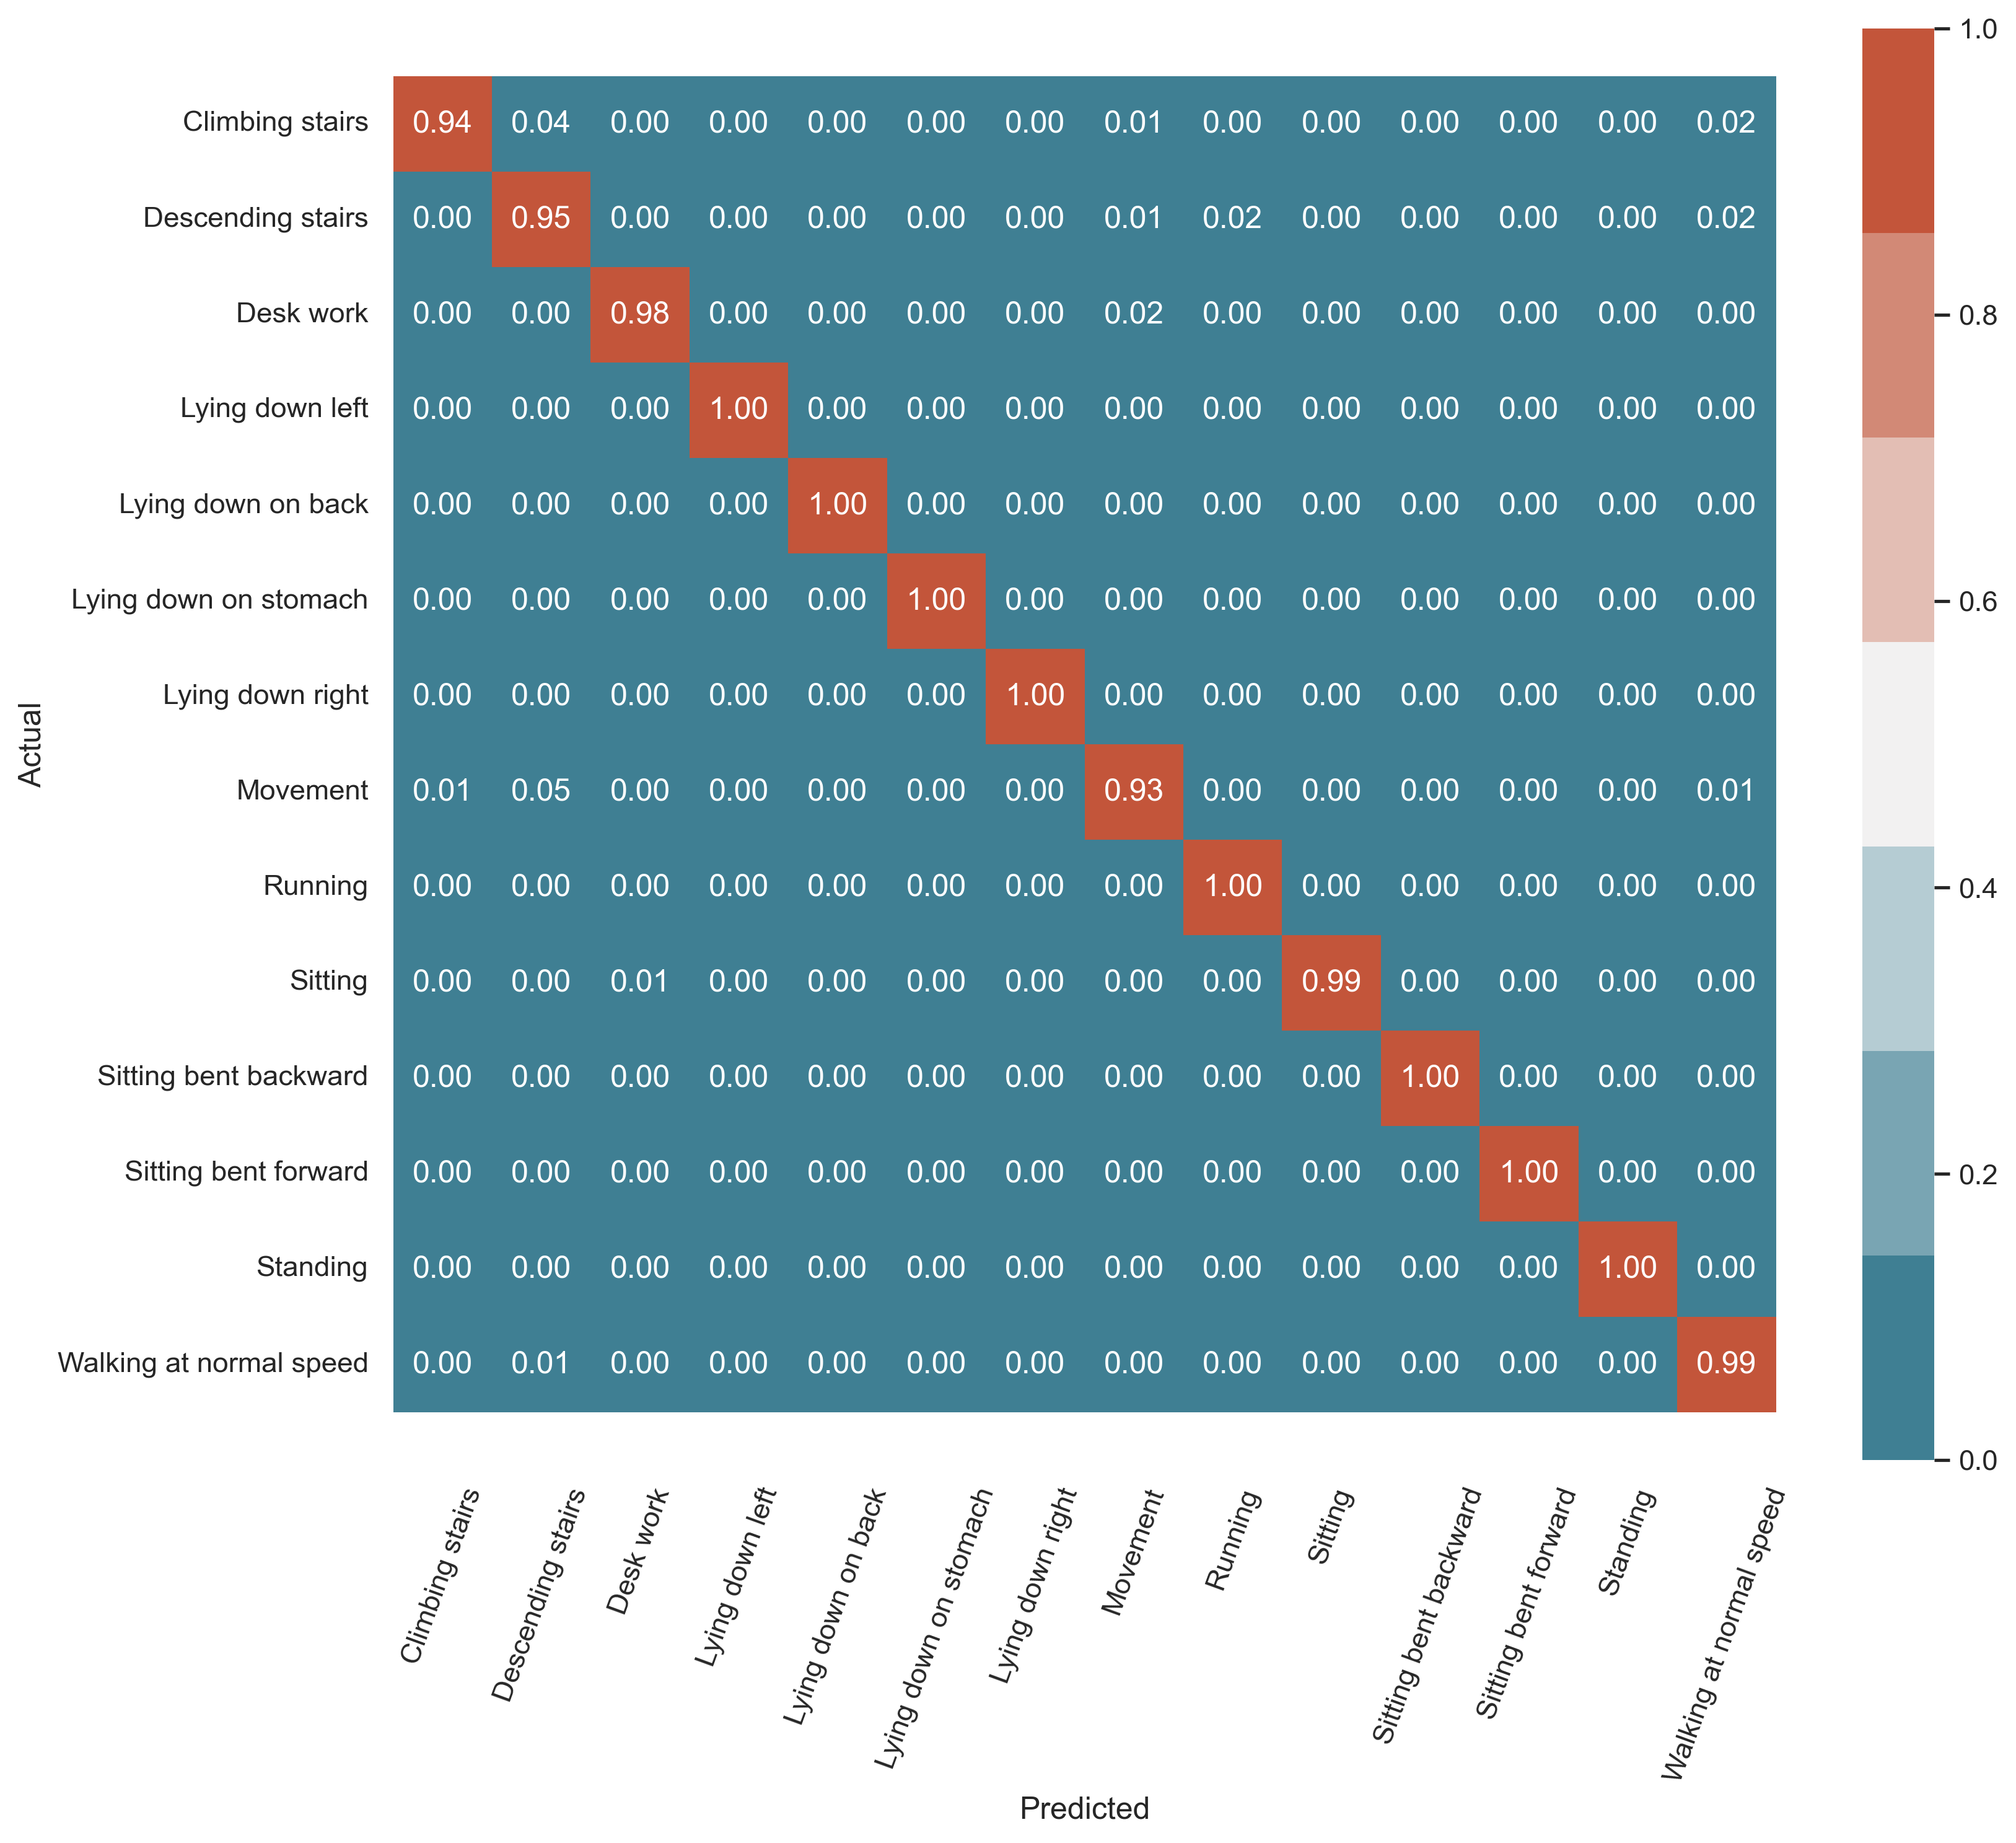

In [17]:
def plot_cm(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    fig, ax = plt.subplots(figsize=(12, 10)) 
    ax = sns.heatmap(
        cm, 
        annot=True, 
        fmt=".2f", 
        cmap=sns.diverging_palette(220, 20, n=7),
        ax=ax
    )

    plt.xticks(rotation=70)
    plt.yticks(rotation=90)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names, rotation=0)
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1)

rcParams['figure.figsize'] = 22, 10
rcParams['figure.dpi'] = 300

plot_cm(
    encoder.inverse_transform(y_test),
    encoder.inverse_transform(predy),
    encoder.categories_[0]
) 

In [18]:
# all model
all_converter = tf.lite.TFLiteConverter.from_keras_model(all_model)
tflite_all_model = all_converter.convert()

with open('256_all_model.tflite', 'wb') as f:
  f.write(tflite_all_model)

INFO:tensorflow:Assets written to: C:\Users\minsu\AppData\Local\Temp\tmp34l7d2r0\assets


INFO:tensorflow:Assets written to: C:\Users\minsu\AppData\Local\Temp\tmp34l7d2r0\assets


In [19]:
# respeck model
respeck_converter = tf.lite.TFLiteConverter.from_keras_model(respeck_model)
tflite_respeck_model = respeck_converter.convert()

with open('256_respeck_model.tflite', 'wb') as f:
  f.write(tflite_respeck_model)

INFO:tensorflow:Assets written to: C:\Users\minsu\AppData\Local\Temp\tmp_scyp0bg\assets


INFO:tensorflow:Assets written to: C:\Users\minsu\AppData\Local\Temp\tmp_scyp0bg\assets


In [20]:
# thingy model
thingy_converter = tf.lite.TFLiteConverter.from_keras_model(thingy_model)
tflite_thingy_model = thingy_converter.convert()

with open('256_thingy_model.tflite', 'wb') as f:
  f.write(tflite_thingy_model)

INFO:tensorflow:Assets written to: C:\Users\minsu\AppData\Local\Temp\tmppx4hbw80\assets


INFO:tensorflow:Assets written to: C:\Users\minsu\AppData\Local\Temp\tmppx4hbw80\assets


In [5]:
interpreter = tf.lite.Interpreter(model_path="all_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [6]:
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 25,
  'shape': array([ 1, 14]),
  'shape_signature': array([-1, 14]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]